In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

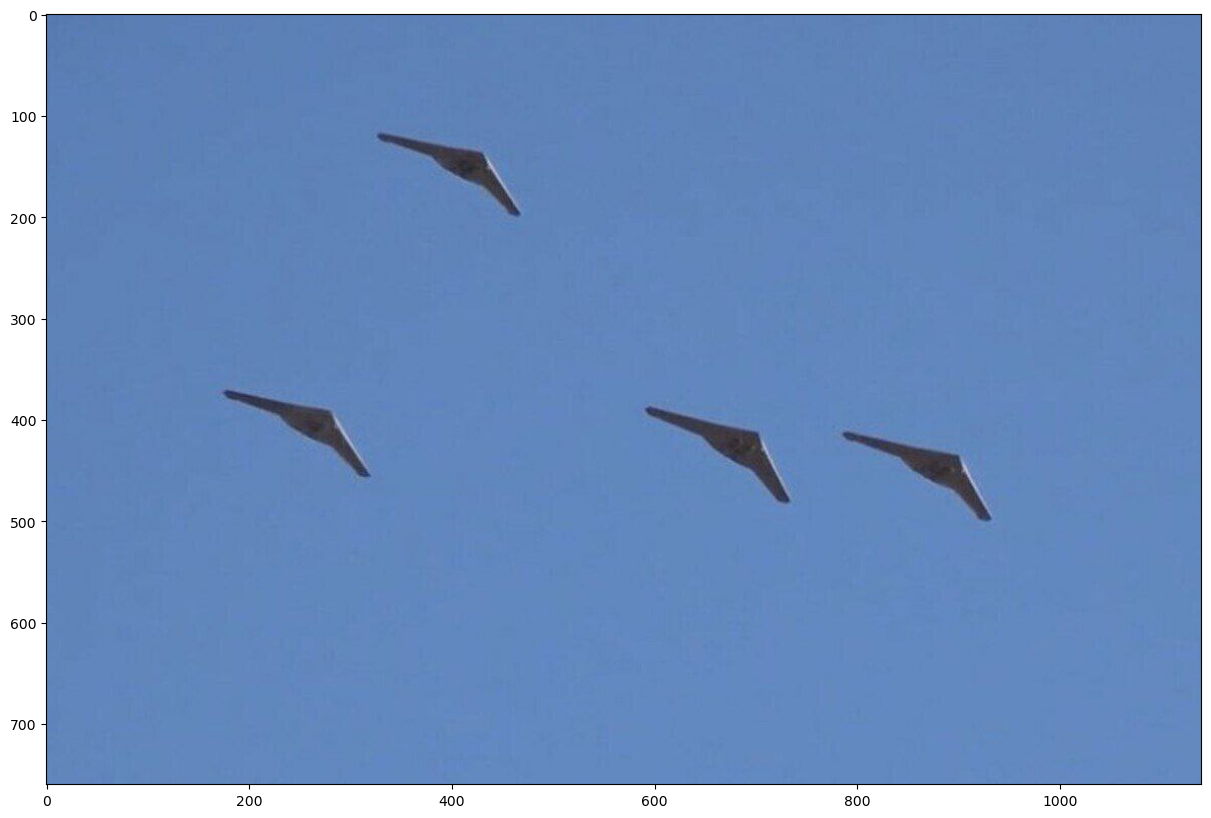

In [91]:
img = cv2.imread('data/driny.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

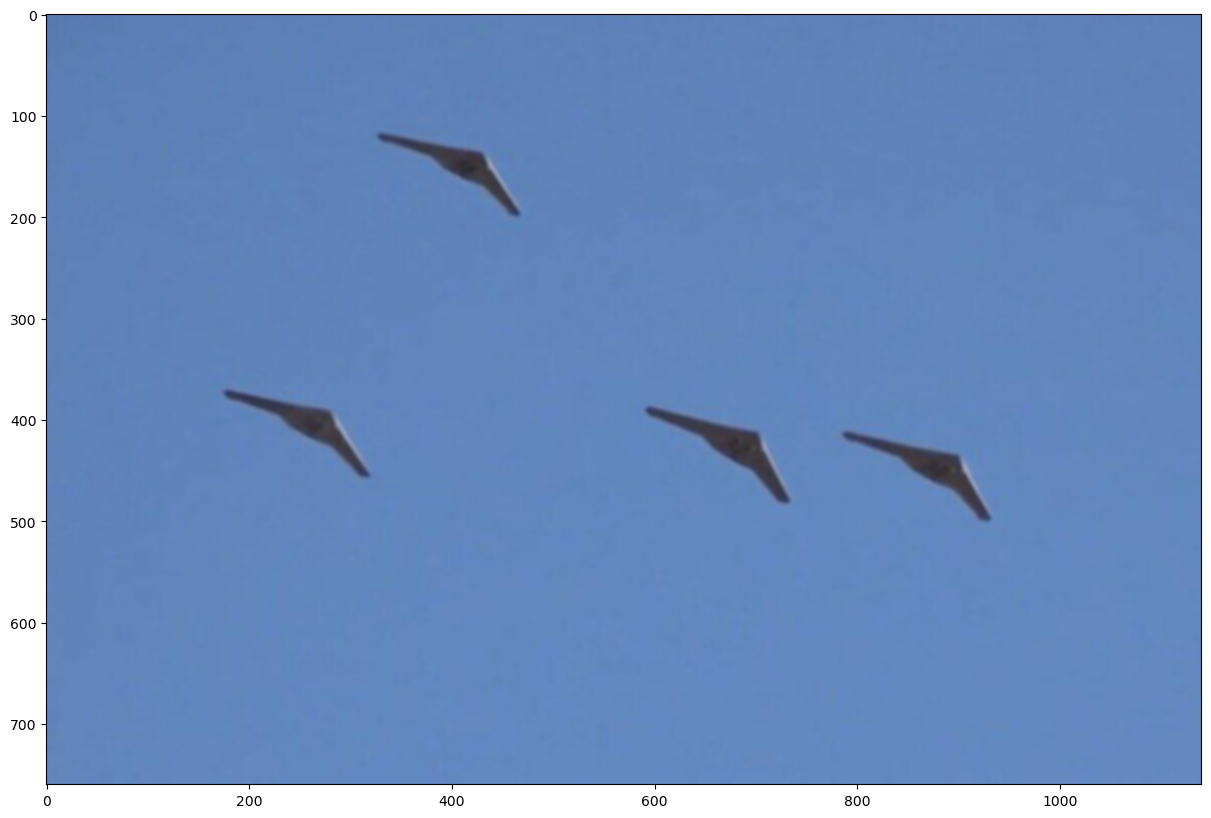

In [93]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=5)
plt.imshow(unsharp)

In [95]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
img_float = img.astype(np.float32)
unsharp_float = unsharp.astype(np.float32)
diff = img_float - unsharp_float

(<Axes: title={'center': 'unsharp'}>,
 Text(0.5, 1.0, 'unsharp'))

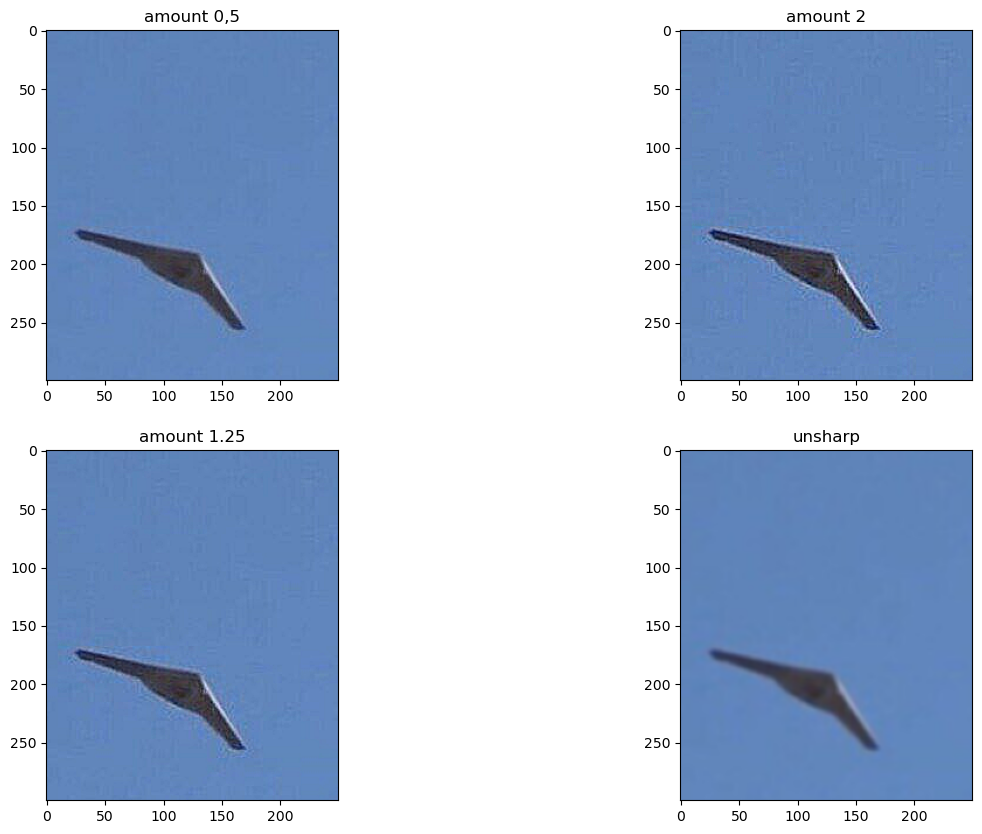

In [111]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amount_min = 0.5
sharpened1 = img_float + diff * amount_min
sharpened1 = np.clip(sharpened1, 0, 255)
sharpened1 = sharpened1.astype(np.uint8)

amount_max= 2
sharpened2 = img_float + diff * amount_max
sharpened2 = np.clip(sharpened2, 0, 255)
sharpened2 = sharpened2.astype(np.uint8)

amount_average = 1.25
sharpened3 = img_float + diff * amount_average
sharpened3 = np.clip(sharpened3, 0, 255)
sharpened3 = sharpened3.astype(np.uint8)

plt.subplot(221), plt.imshow(sharpened1[200:500, 150:400, :]), plt.title('amount 0,5')
plt.subplot(222), plt.imshow(sharpened2[200:500, 150:400, :]), plt.title('amount 2')
plt.subplot(223), plt.imshow(sharpened3[200:500, 150:400, :]), plt.title('amount 1.25')
plt.subplot(224), plt.imshow(unsharp[200:500, 150:400, :]), plt.title('unsharp')

In [ ]:
### Questions
* What is a good (reasonable) value for the `amount` parameter?
Typically, the radius is between 0.5 and 2 pixels. The example uses the minimum, maximum, and average value. At an average value,
a noticeable sharpness effect is achieved without excessive noise, but everything depends on the image

 * What happens if it is too small? | Minimal sharpening effect

 * What happens if it is too large? | The appearance of artifacts, not natural appearance